<a href="https://colab.research.google.com/github/jhonda18/Python3/blob/main/Clase_11_20210703.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introducción al Machine Learning

En los últimos años, el aprendizaje automático se ha dado a conocer por sus grandes logros, un ejemplo de esto, es el tan conocido clasificador de *Spam*. Aunque el aprendizaje automático ha cogido mucha fuerza en los últimos años, muchos de los algoritmos ya existían desde hace mucho tiempo.

Algo muy común es creer que el aprendizaje automático es Inteligencia Artificial, si bien es una rama de la inteligencia artificial, y existe una retroalimentación constante entre ML e IA, no todas las aplicaciones de ML terminan en IA.

**¿Que es Machine Learning?**

El Machine Learning es la ciencia (y el arte) de programar ordenadores para que aprendan a partir de los datos. Algunas definiciones:

* El ML es el campo de estudio que da a los ordenadores la capacidad de aprender sin ser programados de manera explícita. (**Arthur Samuel, 1959**)
* Se dice que un programa de ordenador aprende de la experiencia **E**, con respecto a una tarea **T** y una medida de rendimiento **R**, si su rendimiento en **T**, medido por **R**, mejora con la experiencia **E**. (**Tom Mitchell, 1997**)

## Tipos de aprendizaje

* Aprendizaje supervisado
    * Clasificación.
        * Clasificación binaria.
        * Clasificación multiclase.
    * Regresión.

* Aprendizaje no supervisado.
    * Clustering.
    * Reducción de la dimensionalidad.
    * Detección de anomalías.

* Aprendizaje semi-supervisado
* Aprendizaje por refuerzo

### Aprendizaje no supervisado

Aunque la mayoría de las aplicaciones del Machine Learning se basan hoy en día en el aprendizaje supervisado (y, como resultado, es ahí donde se realizan las mayores inversiones), la inmensa mayoría de los datos disponibles no están etiquetados: tenemos las características de entrada ***X***, pero no tenemos las etiquetas ***y***.

#### Clustering

El clustering busca particionar el set de datos en grupos, los cuales son llamados *clusters*. El objetivo consiste en separar los datos de tal forma que los puntos dentro de un clúster sean muy similares y se diferencien con puntos de otros clusters.

##### K-Means

El algoritmo K-Means trata de encontrar los centros de los clusters que sean representativos de ciertas regiones de los datos. El algoritmo alterna tres pasos en su ejecución:

1. Se determina un número de clusters.
2. Busca alrededor de cada centro los puntos más cercanos.
3. Recalcula el centro como el promedio de los puntos dentro de ese cluster.

![SegmentLocal](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif "segment")

In [ ]:
!pip install mglearn

In [ ]:
import mglearn
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer

warnings.filterwarnings(action="ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


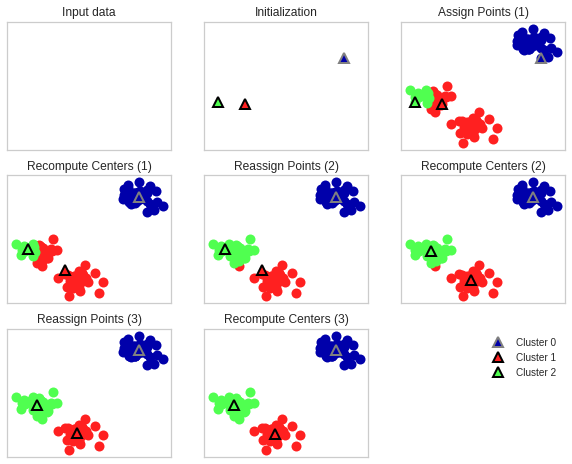

In [ ]:
mglearn.plots.plot_kmeans_algorithm()


* K-Means (Solo numéricas)
* K-Modes (Solo catagóricas)
* K-Prototypes (Datos mixtos)
* PAM
* CLARANs
* Clustering Jerarquico

In [ ]:
mpg = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/Modulo-Python-3/master/data/mpg.csv")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
numerical_features = mpg.select_dtypes(include="number").columns.tolist()
numerical_features.remove("model_year")
numerical_features

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

In [ ]:
numeric_preprocessing = make_pipeline(KNNImputer(n_neighbors=5), StandardScaler())

preprocessor = make_column_transformer((numeric_preprocessing, numerical_features),
                                       remainder="drop")

In [ ]:
kmeans = make_pipeline(preprocessor, KMeans(n_clusters=5, random_state=42))

kmeans.fit(mpg)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('knnimputer',
                                                                   KNNImputer(add_indicator=False,
                                                                              copy=True,
                                                                              metric='nan_euclidean',
                                                                              missing_values=nan,
                                                                              n_neighbors=5,
                                                            

In [ ]:
kmeans["kmeans"].cluster_centers_

array([[ 0.27170905, -0.79406184, -0.68758032, -0.33265806, -0.58185171,
        -0.21987711],
       [-1.15110476,  1.4860546 ,  1.48450715,  1.50450766,  1.38753374,
        -1.06267868],
       [-0.5457552 ,  0.42267351,  0.34041756, -0.08748493,  0.35748557,
         0.39483563],
       [ 1.49880624, -0.83925889, -0.91438555, -0.92262421, -1.06325834,
         0.28678896],
       [ 0.51463748, -0.80622457, -0.78659702, -0.86369054, -0.63127023,
         1.5782325 ]])

In [ ]:
kmeans["kmeans"].inertia_

423.2448635122313

In [ ]:
kmeans.predict(mpg)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 4, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 4, 2, 2, 0, 0, 4, 0, 4, 3, 4, 4, 0, 0, 4, 4, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 4, 4, 4, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 4, 1, 1, 1, 1, 2, 4, 4,
       0, 0, 4, 0, 0, 1, 1, 4, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 4, 0, 4,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 3, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 0, 2, 4, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 1, 1, 1, 1, 2, 2, 2, 2, 4, 4, 0,
       3, 2, 2, 2, 2, 0, 3, 0, 0, 0, 1, 4, 2, 2, 1, 1, 1, 1, 4, 0, 3, 0,
       3, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 4, 0, 3, 3, 3, 0, 2,
       0, 0, 3, 3, 4, 3, 3, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 3, 2, 2, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 0, 4, 2, 4, 2,


##### ¿Cómo determinamos cuantos K?

El algoritmo agrupa los datos en *k* grupos, incluso si *k* no es el número correcto de grupos para usar.

Un método para validar el número de grupos es el ***método del codo***. La idea del método del codo es ejecutar la agrupación en el set de datos para un rango determinado de *k*, y para cada valor de *k* calcular la suma de los errores al cuadrado (SSE).

[yellowbricks clustering](https://www.scikit-yb.org/en/latest/api/cluster/index.html)

In [ ]:
mpg = preprocessor.fit_transform(mpg)

In [ ]:
n_clusters = np.linspace(start=2, stop=18, num=9, dtype=int)


models = [KMeans(n_clusters=n, random_state=42).fit(mpg) for n in n_clusters]

inertia = [model.inertia_ for model in models]

In [ ]:
inertia

[944.8714649940939,
 491.5304264663056,
 365.33552176312327,
 300.43657854697176,
 267.5685459318797,
 239.87524800652778,
 215.06665781719914,
 198.00775168746935,
 179.60194547626202]

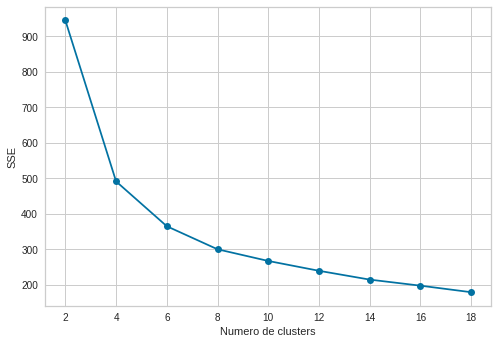

In [ ]:
plt.plot(n_clusters, inertia, marker="o")
plt.xticks(n_clusters)
plt.xlabel("Numero de clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
import yellowbrick

yellowbrick.__version__

'0.9.1'

In [ ]:
!pip install scikit-plot

In [ ]:
silhouette = [silhouette_score(mpg, model.labels_) for model in models]

silhouette

[0.5456087277841829,
 0.3800178468075375,
 0.33404105425253744,
 0.29895354454529893,
 0.27044363427067414,
 0.28514412378214965,
 0.2549138089765812,
 0.25330565268247873,
 0.25863723584371145]

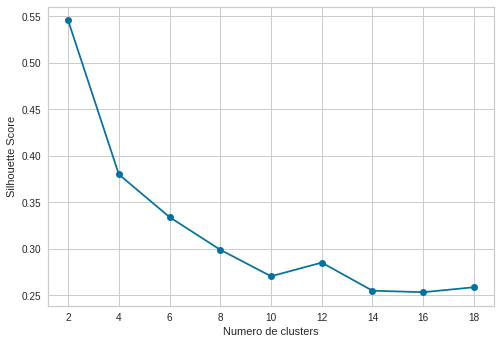

In [ ]:
plt.plot(n_clusters, silhouette, marker="o")
plt.xticks(n_clusters)
plt.xlabel("Numero de clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
from scikitplot.metrics import plot_silhouette

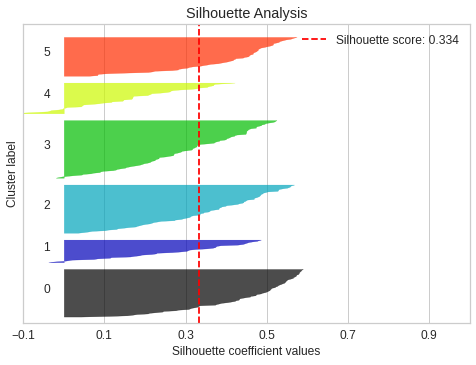

In [ ]:
kmeans = KMeans(n_clusters=6).fit(mpg)

plot_silhouette(X=mpg, cluster_labels=kmeans.predict(mpg))

In [ ]:
mpg = pd.DataFrame(mpg, columns=numerical_features)

In [ ]:
mpg["cluster"] = pd.Series(kmeans.predict(mpg)).apply(lambda x: f"cluster_{int(x + 1)}")

mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,cluster
0,-0.706439,1.498191,1.090604,0.674230,0.630870,-1.295498,cluster_6
1,-1.090751,1.498191,1.503514,1.587939,0.854333,-1.477038,cluster_6
2,-0.706439,1.498191,1.196232,1.196349,0.550470,-1.658577,cluster_6
3,-0.962647,1.498191,1.061796,1.196349,0.546923,-1.295498,cluster_6
4,-0.834543,1.498191,1.042591,0.935290,0.565841,-1.840117,cluster_6
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.474434,-0.213324,0.011586,cluster_4
394,2.624265,-0.856321,-0.925936,-1.362037,-0.993671,3.279296,cluster_5
395,1.087017,-0.856321,-0.561039,-0.526646,-0.798585,-1.440730,cluster_4
396,0.574601,-0.856321,-0.705077,-0.657176,-0.408411,1.100822,cluster_5


In [ ]:
mpg.loc[:, numerical_features] = preprocessor.named_transformers_["pipeline"]["standardscaler"].inverse_transform(mpg[numerical_features])

In [ ]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,cluster
0,18.0,8.0,307.0,130.0,3504.0,12.0,cluster_6
1,15.0,8.0,350.0,165.0,3693.0,11.5,cluster_6
2,18.0,8.0,318.0,150.0,3436.0,11.0,cluster_6
3,16.0,8.0,304.0,150.0,3433.0,12.0,cluster_6
4,17.0,8.0,302.0,140.0,3449.0,10.5,cluster_6
...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,cluster_4
394,44.0,4.0,97.0,52.0,2130.0,24.6,cluster_5
395,32.0,4.0,135.0,84.0,2295.0,11.6,cluster_4
396,28.0,4.0,120.0,79.0,2625.0,18.6,cluster_5


In [ ]:
mpg.groupby(by="cluster").median()

,mpg,cylinders,displacement,horsepower,weight,acceleration
cluster,,,,,,
cluster_1,19.0,6.0,231.0,100.0,3278.0,16.5
cluster_2,13.0,8.0,400.0,180.0,4380.0,11.5
cluster_3,34.0,4.0,97.0,70.0,2065.0,16.0
cluster_4,25.0,4.0,121.0,92.0,2556.0,15.0
cluster_5,27.1,4.0,98.0,70.0,2294.5,19.5
cluster_6,15.0,8.0,318.0,148.0,4054.0,13.5


In [ ]:
mpg.groupby(by="cluster").std()

,mpg,cylinders,displacement,horsepower,weight,acceleration
cluster,,,,,,
cluster_1,2.361821,0.446755,30.250509,11.498606,325.423058,1.820997
cluster_2,1.694697,0.000000,39.477024,22.526028,440.732083,1.546113
cluster_3,3.841959,0.226455,21.975768,8.268838,222.127441,1.473094
cluster_4,3.171598,0.618403,23.158690,11.953457,258.107211,1.453202
cluster_5,6.196030,0.340468,26.420956,13.613576,466.240163,1.706894
cluster_6,2.475984,0.251976,27.064619,12.149563,402.646211,1.464833


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(mpg[numerical_features])

In [ ]:
tsne = TSNE(n_components=2, random_state=42)

tsne_out = tsne.fit_transform(X)

In [ ]:
tsne_df = pd.concat(objs=[pd.DataFrame(tsne_out, columns=["x", "y"]),
                          mpg["cluster"]], axis=1)

tsne_df

,x,y,cluster
0,-5.489828,30.340000,cluster_6
1,-9.213550,33.559254,cluster_6
2,-7.356521,30.727953,cluster_6
3,-6.468780,31.000259,cluster_6
4,-7.523090,30.237774,cluster_6
...,...,...,...
393,-1.230065,-14.265833,cluster_4
394,0.670924,-33.036171,cluster_5
395,-12.017209,-21.118668,cluster_4
396,4.157040,-20.242855,cluster_5


In [ ]:
import seaborn as sns

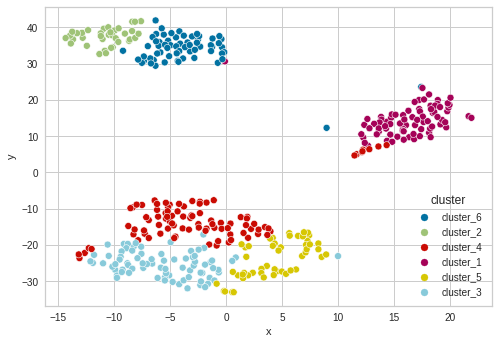

In [ ]:
sns.scatterplot(data=tsne_df, x="x", y="y", hue="cluster")

In [ ]:
mpg.groupby(by="cluster").median().style.background_gradient()

,mpg,cylinders,displacement,horsepower,weight,acceleration
cluster,,,,,,
cluster_1,19.000000,6.000000,231.000000,100.000000,3278.000000,16.500000
cluster_2,13.000000,8.000000,400.000000,180.000000,4380.000000,11.500000
cluster_3,34.000000,4.000000,97.000000,70.000000,2065.000000,16.000000
cluster_4,25.000000,4.000000,121.000000,92.000000,2556.000000,15.000000
cluster_5,27.100000,4.000000,98.000000,70.000000,2294.500000,19.500000
cluster_6,15.000000,8.000000,318.000000,148.000000,4054.000000,13.500000


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2, random_state=42)

pca_df = pd.concat(objs=[pd.DataFrame(pca.fit_transform(X), columns=["pc_1", "pc_2"]),
                         mpg["cluster"]], axis=1)

pca_df

,pc_1,pc_2,cluster
0,2.352876,-0.576288,cluster_6
1,3.235212,-0.685493,cluster_6
2,2.697895,-0.998250,cluster_6
3,2.632850,-0.625733,cluster_6
4,2.627021,-1.097237,cluster_6
...,...,...,...
393,-1.075449,-0.263229,cluster_4
394,-3.801820,1.989489,cluster_5
395,-1.202558,-1.882367,cluster_4
396,-1.692994,0.630904,cluster_5


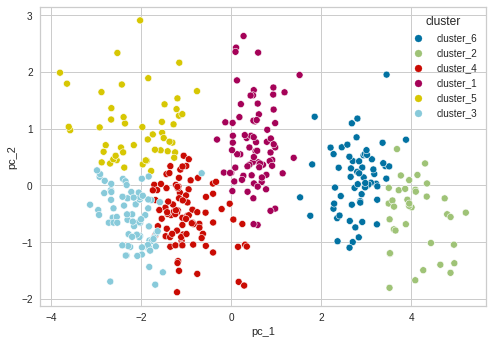

In [ ]:
sns.scatterplot(data=pca_df, x="pc_1", y="pc_2", hue="cluster")